# Gradient-Effected Object Recognition Gauge for hive Entrances (GEORGE)
Neural-net-powered honeybee hive-mounted pollen, varroa, and wasp counter

## Imports

In [1]:
import sys
sys.path.append("/home/kevinhardin/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/local/games:/usr/games")
sys.path.append("CameraScript")
sys.path.append("/home/kevinhardin/Documents/GEORGE")
# sys.path.append("/Users/kevinhardin/Documents/GitHub/GEORGE")
from CameraScript import takePic
from time import sleep, time
from datetime import datetime, date
import os
os.environ["LIBCAMERA_LOG_LEVELS"] = "2"
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import glob
import numpy as np
import tensorflow as tf
from pathlib import Path
from GEORGE_Library import *
%matplotlib inline

print("Done")

Done


## Define global variables

In [2]:
label_id_offset = 1
score_threshold = 0.4
category_index = {1: {'id': 1, 'name': 'regular'}, 2: {'id': 2, 'name': 'pollen'}, 3: {'id': 3, 'name': 'varroa'}, 4: {'id': 4, 'name': 'wasps'}}
model_directory = "/home/kevinhardin/Documents/GEORGE"
model_name = 'extract_superimp_model'
# model_name = 'model.tflite'
model_dest = os.path.join(os.sep, model_directory, model_name)

print("Done")

Done


2 0.45479086
No detections
No detections


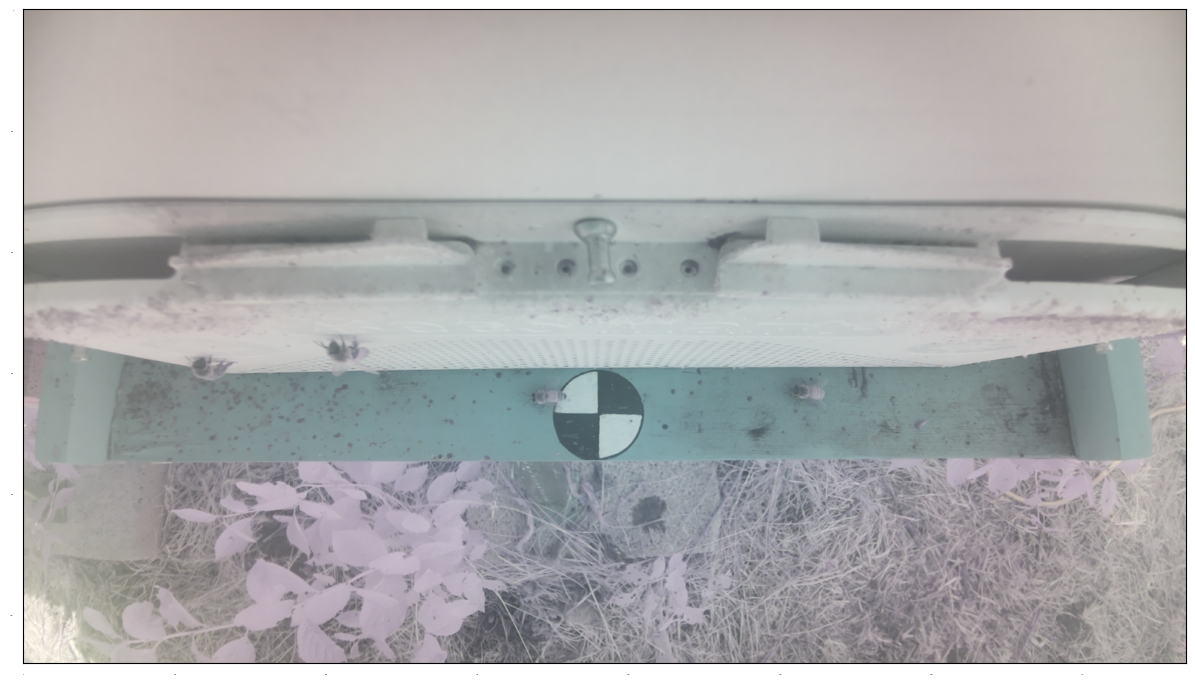

In [3]:
# for item in os.listdir("tmp"):
#     item_path = os.path.join("tmp", item)
#     if os.path.isfile(item_path):
#         os.remove(item_path)
        
current_datetime = datetime.now()
current_filename = "tmp/image" + current_datetime.strftime("_%y-%m-%d_%H_%M_%S") + ".png"
im, _, _ = takePic()
im.save(current_filename)

new_model = tf.saved_model.load(model_dest)

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [15, 15]

save_plot = False

im = Image.open(current_filename)

for i in range(3):
    image = np.array(im).astype('uint8')[440:, (640 * i):(640 * (i + 1)), :]

    bboxes = []
    class_ids = []
    scores = []

    input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    input_tensor = tf.expand_dims(input_tensor, 0)
    detections = new_model.signatures['detect'](input_tensor)

    for k in range(len(detections['detection_boxes'][0])):
        if detections['detection_scores'][0][k].numpy() >= score_threshold:
            y1, x1, y2, x2  = np.array(detections['detection_boxes'][0][k])
            bboxes.append([y1, x1, y2, x2])
            class_id = detections['detection_classes'][0][k].numpy().astype(np.uint32) + label_id_offset
            class_name = category_index[class_id]['name']
            score = detections['detection_scores'][0][k].numpy()
            class_ids.append(class_id)
            scores.append(score)

    if not scores == []:
        # plot_detections(
        # image,
        # np.asarray(bboxes),
        # np.asarray(class_ids),
        # scores,
        # category_index)#, figsize=(30, 15))
        [print(class_id, score) for class_id, score in zip(np.asarray(class_ids), scores)]

    else:
        print("No detections")

fig, ax = plt.subplots()      
plt.imshow(im)
plt.show()